<b>Link Dataset Adalah Sebagai Berikut</b><br>
https://www.kaggle.com/datasets/kreeshrajani/human-stress-prediction

<h1>Goal Project Ini</h1>
Mampu Memvisualisasikan Teks pada Dataset dan Hasil Klasifikasinya Menggunakan Word Cloud, Sentiment Analysis, dll.

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
import time

In [ ]:
# import from GDrive
# from google.colab import drive
# drive.mount('/content/drive')
# df1 = pd.read_csv('/content/drive/MyDrive/Capstone3_DM/Stress.csv')

Mounted at /content/drive


In [ ]:
#import from uploaded file
df1 = pd.read_csv('/content/Stress.csv')

<b>Mengatasi Nilai Null</b>

In [ ]:
#apakah terdapat nilai NULL di dataset?
df1.isna().any()

subreddit           False
post_id             False
sentence_range      False
text                False
label               False
confidence          False
social_timestamp    False
dtype: bool

<b>Mengatasi Nilai Duplikat</b>

In [ ]:
#mencari jumlah data yang unik pada kolom 'text'
df1['text'].nunique()

2820

In [ ]:
#mencari ukuran baris dan kolom dari dataset
df1.shape

(2838, 7)

In [ ]:
#Terdapat 2838-2820 = 18 data duplikat

#pembersihan data duplikat
df = df1.drop_duplicates(subset='text',keep="first")

In [ ]:
#mencari ukuran baris dan kolom dari dataset setelah pembersihan duplikat
df.shape

(2820, 7)

In [ ]:
# Dilakukan reset index karena terdapat data yang terhapus agar index tetap terurut
df  = df.reset_index()

<b>Proses Data Cleaning</b>

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
def clean_text(text):
    # menghilangkan HTML tags
    text = re.sub('<.*?>', '', text)
    # menghilangkan karakter non-alpabet dan mengubah semua jadi lowercase
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    # proses tokenisasi
    words = nltk.word_tokenize(text)
    # menghilangkan stopwords
    words = [w for w in words if w not in stopwords.words('english')]
    # menghilangkan imbuhan pada kata
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    # menggabungkan kata kata kembali menjadi string
    text = ' '.join(words)
    return text

In [ ]:
%%time

tqdm.pandas()

df['cleaned_text'] = df['text'].progress_apply(clean_text)
df['cleaned_text']

  0%|          | 0/2820 [00:00<?, ?it/s]

CPU times: user 30.9 s, sys: 3.54 s, total: 34.5 s
Wall time: 40 s


0       said felt way sugget go rest trigger ahead you...
1       hey r assist sure right place post goe current...
2       mom hit newspap shock would know like play hit...
3       met new boyfriend amaz kind sweet good student...
4       octob domest violenc awar month domest violenc...
                              ...                        
2815    week ago preciou ignor jan happi year preciou ...
2816    abil cope anymor tri lot thing trigger shut wo...
2817    case first time read post look peopl will comp...
2818    find normal good relationship main problem see...
2819    talk mom morn said sister trauma wors mine dev...
Name: cleaned_text, Length: 2820, dtype: object

<h1>Capstone 4</h1>
Hafizh Raihan Kurnia Putra <br>
Jafar Shidqul Azzam <br>
Muhammad Rusydi Hanan <br>

<b>Memeriksa Distribusi Kelas</b>

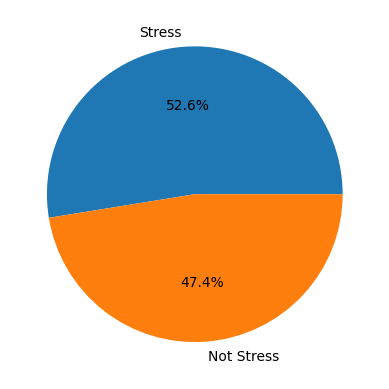

In [ ]:
def ratings(rating):
    if rating==1:
        return "Stress"
    if rating==0:
        return "Not Stress"

dfcopy = df.copy()
dfcopy['label'] = dfcopy['label'].apply(ratings)


plt.pie(dfcopy['label'].value_counts(), labels=dfcopy['label'].unique().tolist(), autopct='%1.1f%%')
plt.show()
plt.close()

Piechart diatas, menampilkan distribusi label kelas yang terdapat dalam dataset. Dari visual yang ditampilkan pada barchart diatas, terlihat bahwa label kelas 0 (Tidak Stress) memiliki frekuensi yang lebih sedikit dibandingkan label kelas 1 (Stress). Label kelas 1 memiliki presentase jumlah tweet sebanyak 52.6%, sedangkan label kelas 0 memiliki presentase jumlah tweet sebanyak 47.4%.

<b>Visualisasi kata dengan Word Cloud</b>

In [ ]:
from wordcloud import WordCloud

In [ ]:
# split df - positive and negative sentiment:
df_positive = df[df['label'] == 1]
df_negative = df[df['label'] == 0]

In [ ]:
# Create Word Cloud for Non-Stress
text_pos = ' '.join([word for word in df_positive['cleaned_text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud_pos = WordCloud(max_words=500, width=1600, height=800).generate(text_pos)

# Create Word Cloud for Stress
text_neg = ' '.join([word for word in df_negative['cleaned_text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud_negative = WordCloud(max_words=500, width=1600, height=800).generate(text_neg)

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

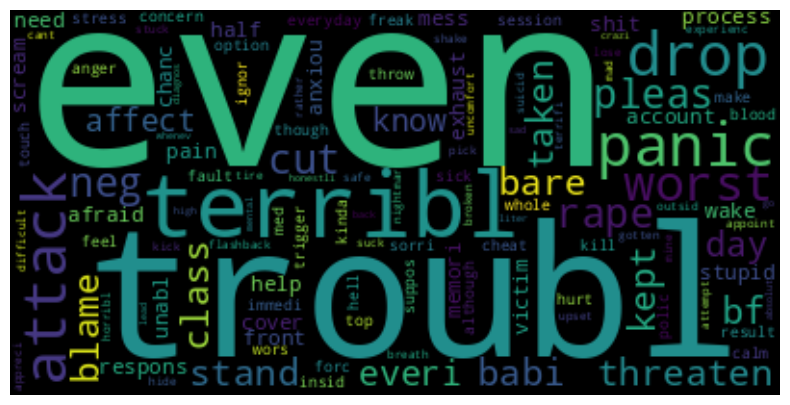

In [ ]:
# Show WordCloud For Stress
set1 = set(wordcloud_pos.words_)
set2 = set(wordcloud_negative.words_)

negative = set1 - set2
wordcloud_neg_only = WordCloud().generate_from_text(" ".join(negative))

# Display the resulting wordcloud
plt.figure(figsize=(10,5), facecolor='None')
plt.imshow(wordcloud_neg_only, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download stopwords jika belum diunduh
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
additional_stopwords = ['im', 'cant', 'dont']
stop_words.update(additional_stopwords)
# Mengidentifikasi kata-kata yang bukan stopwords dan kata benda
nouns = []
adjectives = []
verbs = []
for index, row in df_negative.iterrows():
    text = row['cleaned_text']
    tokens = word_tokenize(text)

    for token in tokens:
        if token.lower() not in stop_words and nltk.pos_tag([token])[0][1] == 'NN':
            nouns.append(token)
        if token.lower() not in stop_words and nltk.pos_tag([token])[0][1] == 'JJ':
          adjectives.append(token)
        if token.lower() not in stop_words and nltk.pos_tag([token])[0][1] == 'VB':
          verbs.append(token)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


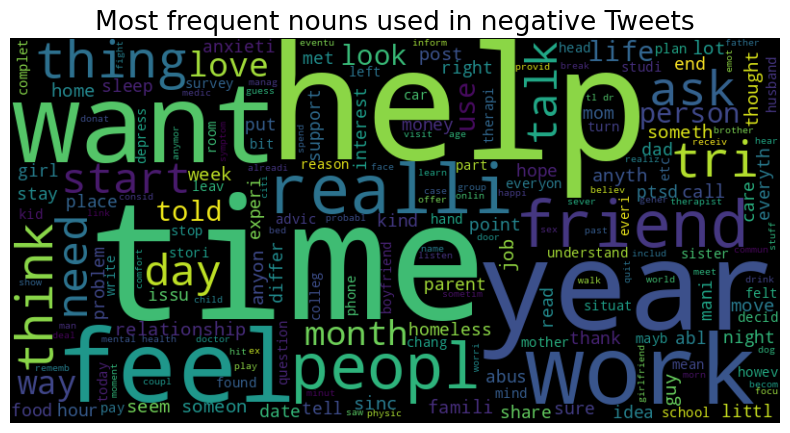

In [ ]:
# Menggabungkan kata-kata menjadi string
nouns_text = " ".join(nouns)

# Membuat WordCloud dari kata-kata benda
wordcloud = WordCloud(width=800, height=400).generate(nouns_text)

# Menampilkan WordCloud
plt.figure(figsize=(10,5), facecolor='None')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent nouns used in negative Tweets', fontsize=19)
plt.show()

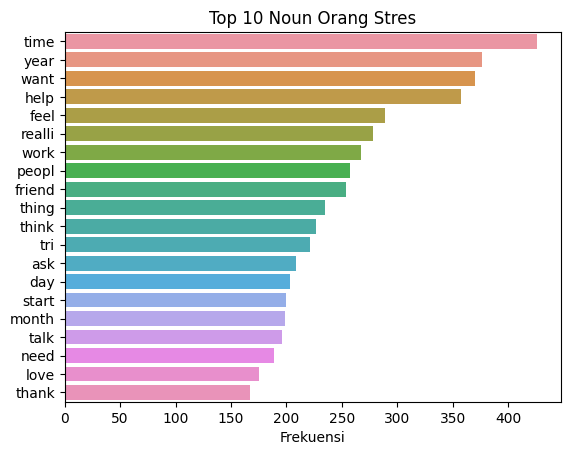

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from nltk import FreqDist
from nltk.tokenize import word_tokenize
token_1 = word_tokenize(nouns_text)
fdist = FreqDist(token_1)
dfTop = pd.DataFrame.from_dict(fdist, orient='index', columns=['Frekuensi'])
dfTop = dfTop.sort_values('Frekuensi', ascending=False)  # Urutkan berdasarkan frekuensi
df_top_10 = dfTop.head(20)
# plt.figure(figsize=(10, 6))  # Atur ukuran plot sesuai kebutuhan Anda
# plt.bar(df_top_10.index, df_top_10['Frekuensi'])
# plt.xlabel('Kata-kata')
# plt.ylabel('Frekuensi')
# plt.title('Bar Plot dari Teks (Top 10)')
# plt.xticks(rotation=45)  # Untuk memutar label sumbu x agar tidak tumpang tindih
# plt.show()
sns.barplot(x=df_top_10['Frekuensi'], y=df_top_10.index)
plt.title('Top 10 Noun Orang Stres')
plt.show()

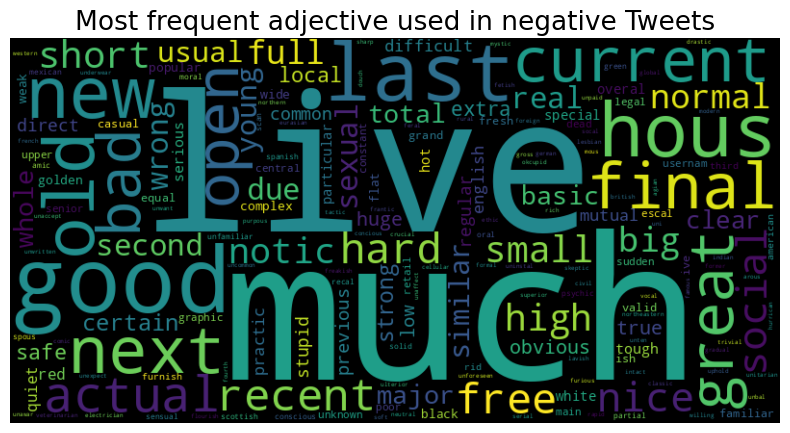

In [ ]:
# Menggabungkan kata-kata menjadi string
adj_text = " ".join(adjectives)

# Membuat WordCloud dari kata-kata benda
wordcloud = WordCloud(width=800, height=400).generate(adj_text)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent adjective used in negative Tweets', fontsize=19)
plt.show()

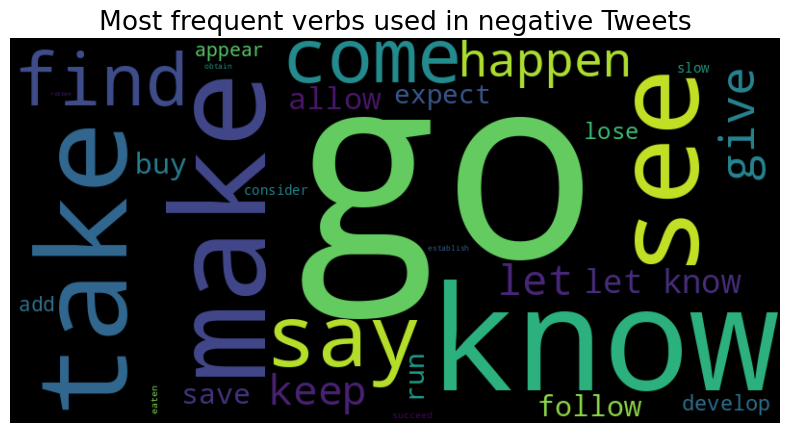

In [ ]:
# Menggabungkan kata-kata menjadi string
verbs_text = " ".join(verbs)

# Membuat WordCloud dari kata-kata benda
wordcloud = WordCloud(width=800, height=400).generate(verbs_text)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent verbs used in negative Tweets', fontsize=19)
plt.show()

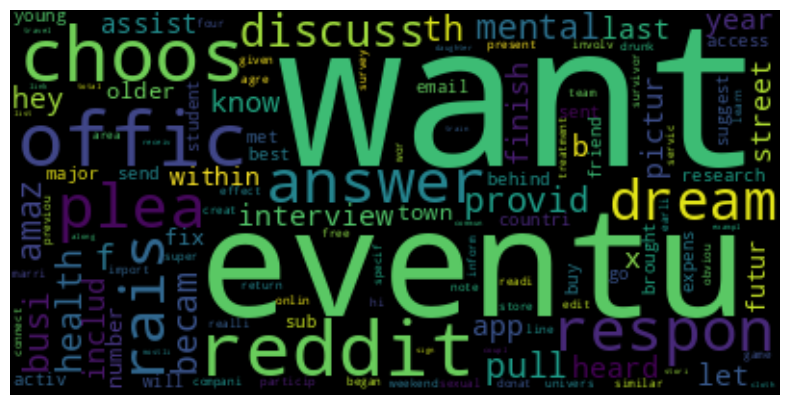

In [ ]:
# Show WordCloud For Non-Stress
pos = set2 - set1
wordcloud_pos_only = WordCloud().generate_from_text(" ".join(pos))

# Display the resulting wordcloud
plt.figure(figsize=(10,5), facecolor='None')
plt.imshow(wordcloud_pos_only, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download stopwords jika belum diunduh
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
additional_stopwords = ['im', 'cant', 'dont']
stop_words.update(additional_stopwords)
# Mengidentifikasi kata-kata yang bukan stopwords dan kata benda
nouns = []
adjectives = []
verbs = []
for index, row in df_positive.iterrows():
    text = row['cleaned_text']
    tokens = word_tokenize(text)

    for token in tokens:
        if token.lower() not in stop_words and nltk.pos_tag([token])[0][1] == 'NN':
            nouns.append(token)
        if token.lower() not in stop_words and nltk.pos_tag([token])[0][1] == 'JJ':
          adjectives.append(token)
        if token.lower() not in stop_words and nltk.pos_tag([token])[0][1] == 'VB':
          verbs.append(token)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


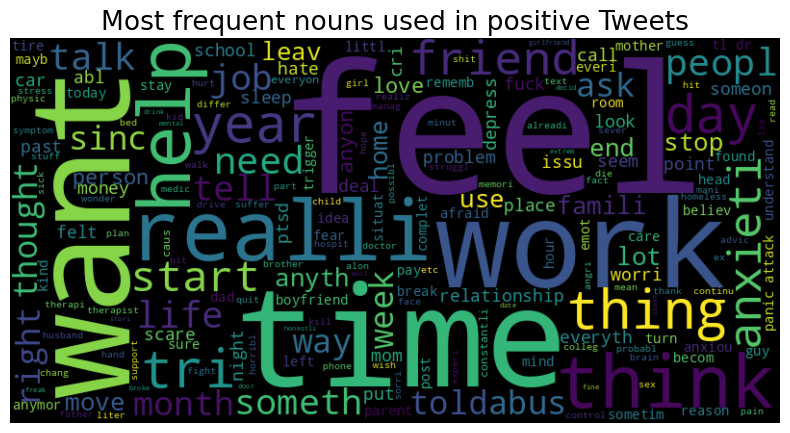

In [ ]:
# Menggabungkan kata-kata menjadi string
nouns_text = " ".join(nouns)

# Membuat WordCloud dari kata-kata benda
wordcloud = WordCloud(width=800, height=400).generate(nouns_text)

# Menampilkan WordCloud
plt.figure(figsize=(10,5), facecolor='None')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent nouns used in positive Tweets', fontsize=19)
plt.show()

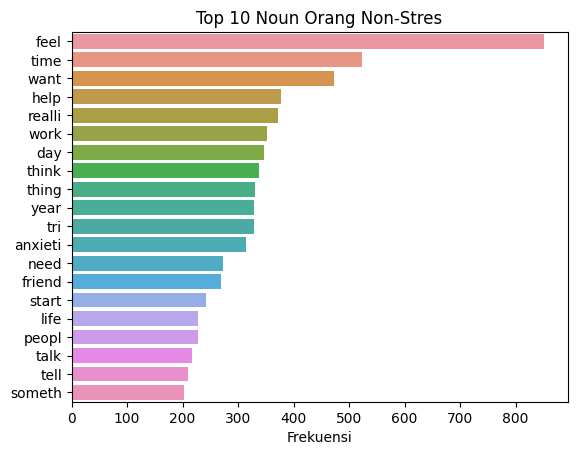

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from nltk import FreqDist
from nltk.tokenize import word_tokenize
token_1 = word_tokenize(nouns_text)
fdist = FreqDist(token_1)
dfTop = pd.DataFrame.from_dict(fdist, orient='index', columns=['Frekuensi'])
dfTop = dfTop.sort_values('Frekuensi', ascending=False)  # Urutkan berdasarkan frekuensi
df_top_10 = dfTop.head(20)
# plt.figure(figsize=(10, 6))  # Atur ukuran plot sesuai kebutuhan Anda
# plt.bar(df_top_10.index, df_top_10['Frekuensi'])
# plt.xlabel('Kata-kata')
# plt.ylabel('Frekuensi')
# plt.title('Bar Plot dari Teks (Top 10)')
# plt.xticks(rotation=45)  # Untuk memutar label sumbu x agar tidak tumpang tindih
# plt.show()
sns.barplot(x=df_top_10['Frekuensi'], y=df_top_10.index)
plt.title('Top 10 Noun Orang Non-Stres')
plt.show()

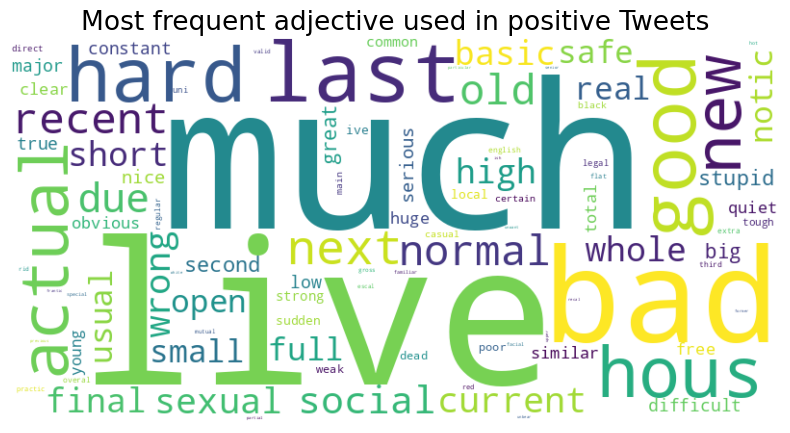

In [ ]:
# Menggabungkan kata-kata menjadi string
adj_text = " ".join(adjectives)

# Membuat WordCloud dari kata-kata benda
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(adj_text)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent adjective used in positive Tweets', fontsize=19)
plt.show()

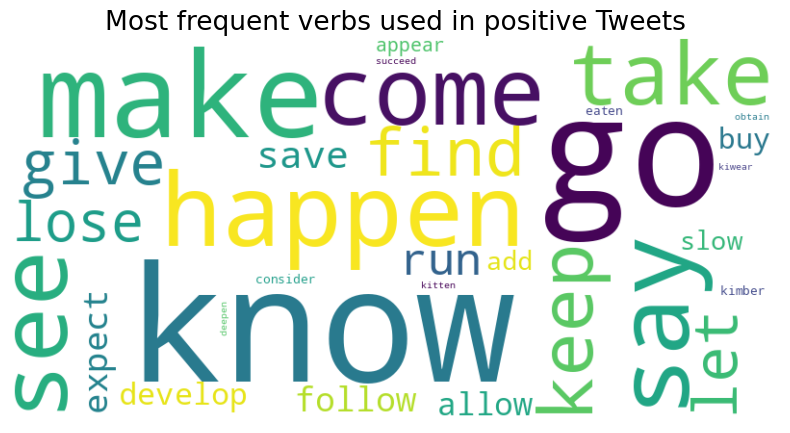

In [ ]:
# Menggabungkan kata-kata menjadi string
verbs_text = " ".join(verbs)

# Membuat WordCloud dari kata-kata benda
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(verbs_text)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent verbs used in positive Tweets', fontsize=19)
plt.show()

Visualisasi diatas merupakan grafik representasi frekuensi kata yang paling banyak digunakan dalam dataset. Frekuensi kata tersebut direpresentasikan menggunakan wordcloud. Dalam wordcloud, semakin besar ukuran satu kata yang ditampilkan, akan merepresentasikan jumlah frekuensi kemunculan kata dalam dataset tersebut. Dalam dataset yang digunakan dalam kasus ini, kata "go", "feel", "know", dan "want" memiliki frekuensi terbanyak, sehingga ukuran keempat kata tersebut merupakan yang terbesar dalam wordcloud diatas. Hal itu juga berlaku sebaliknya, semakin kecil kata yang ditampilkan pada wordcloud dibandingkan dengan kata yang lain, maka kata tersebut memiliki frekuensi yang lebih sedikit. Dalam kasus ini, kata yang ditampilkan dalam visualisasi wordcloud ini dibatasi hanya 500 kata.

<b>Sentiment Analysis</b>

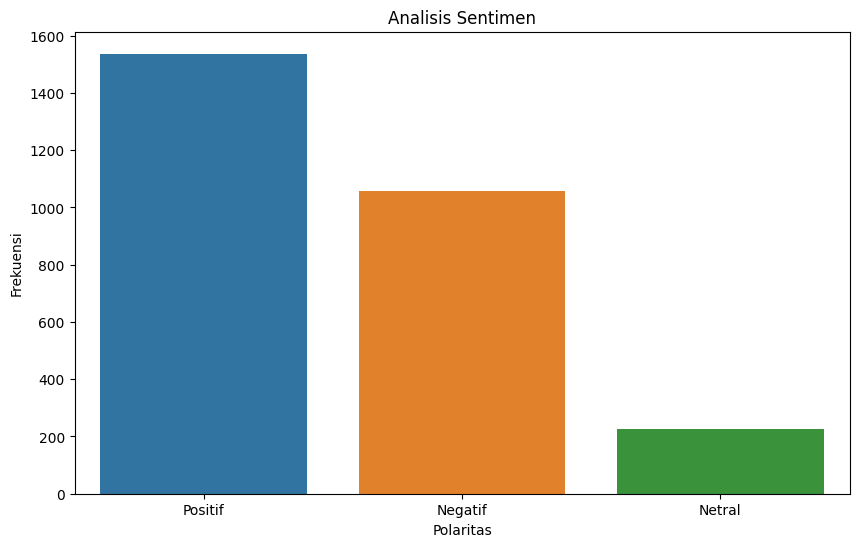

In [ ]:
import pandas as pd
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt


df_sents = df
# Menganalisis sentimen untuk setiap teks dalam dataset
sentiments = []
for text in df_sents['cleaned_text']:
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score > 0:
        sentiment = "Positif"
    elif sentiment_score < 0:
        sentiment = "Negatif"
    else:
        sentiment = "Netral"
    sentiments.append(sentiment)

# Menambahkan kolom sentimen ke dalam dataset
df_sents['Sentimen'] = sentiments

# creating the bar plot
value_counts = df_sents['Sentimen'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.title('Analisis Sentimen')
plt.xlabel('Polaritas')
plt.ylabel('Frekuensi')
plt.show()

Disni akan dilakukan visualisasi dengan sentiment analysis yang menghasilkan dua grafik. Polarity disni menunjukkan tingkat positif atau negatif dari suatu data. Dapat kita lihat data lebih banyak yang bersifat postitf namun pada tingkatan yang tidak terlalu tinggi.

Subjektifitas sendiri menunjukkan tingkat subjektifias suatu data atau disini yaitu teksnya. Dapat kita lihat pada grafik bahwa subjektifitas cenderung netral dimana tidak terlalu faktual atau tidak terlalu subjektif, namun dapat juga kita lihat bahwa data yang terlalu subjektif lebih banyak daripada yang bersifat terlalu faktual

<b>Term Frequency Analysis</b>

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2820/2820 [00:00<00:00, 146014.90it/s]

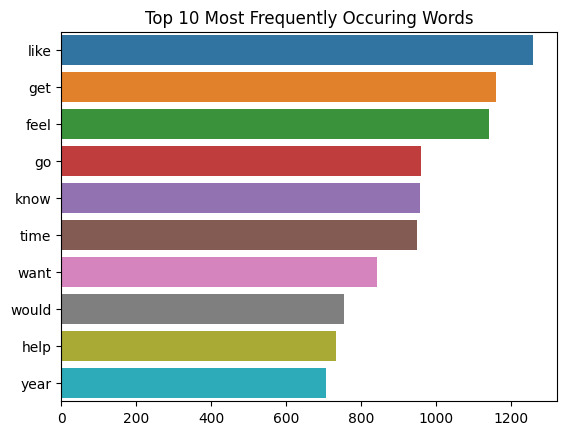

In [ ]:
from collections import Counter
from tqdm import trange
import seaborn as sns

# Membuat copy dataset agar data asli aman dari perubahan
dfcopy = df.copy()

def corpus(text):
    text_list = text.split()
    return text_list

dfcopy['review'] = dfcopy['cleaned_text'].apply(corpus)

# Membuat List yang berisi kumpulan kata-kata dalam dataset
corpus = []

for i in trange(dfcopy.shape[0], ncols=1000, nrows=10, colour='green', smoothing=0.8):
  corpus += dfcopy['review'][i]

# Mencari 10 kata yang paling sering muncul
len(corpus)
mostCommon = Counter(corpus).most_common(10)

words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

# Visualisasi
sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

#**Penambahan fitur dengan NRC**

In [ ]:
!pip install nrclex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nrclex: filename=NRCLex-3.0.0-py3-none-any.whl size=43308 sha256=9889098fe850bb92f3d82aa129d6b64f7765df4080763d87e54ce0676e5b6b95
  Stored in directory: /root/.cache/pip/wheels/d2/10/44/6abfb1234298806a145fd6bcaec8cbc712e88dd1cd6cb242fa
Successfully built nrclex


In [ ]:
from nrclex import NRCLex
str_tweet = ','.join(df['cleaned_text'])
text_object = NRCLex(str_tweet)
data = text_object.affect_frequencies

In [ ]:
data

{'fear': 0.08788023019341439,
 'anger': 0.07340660291636017,
 'anticip': 0.0,
 'trust': 0.11754143048764658,
 'surprise': 0.04919735191034572,
 'positive': 0.1808446194452858,
 'negative': 0.15605123101553373,
 'sadness': 0.07587296092769677,
 'disgust': 0.04378867206092337,
 'joy': 0.08813984682618667,
 'anticipation': 0.12727705421660682}

In [ ]:
print(data['positive'])

0.1808446194452858


In [ ]:
affect_df = pd.DataFrame.from_dict(text_object.affect_frequencies, orient='index')

In [ ]:
affect_df.head(20)

,0
fear,0.087880
anger,0.073407
anticip,0.000000
trust,0.117541
surprise,0.049197
positive,0.180845
negative,0.156051
sadness,0.075873
disgust,0.043789
joy,0.088140


**Penambahan fitur untuk teks positif**

In [ ]:
import nrclex
# Fungsi untuk melakukan analisis sentimen pada teks
def add_positive_feature(tweet):
    lexicon = nrclex.NRCLex(tweet)
    sentiment_scores = lexicon.affect_frequencies
    post = sentiment_scores['positive']
    return post

df['post'] = df['cleaned_text'].apply(add_positive_feature)

In [ ]:
df

,index,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,cleaned_text,Sentimen,post
0,0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.800000,1521614353,said felt way sugget go rest trigger ahead you...,Positif,0.208333
1,1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.000000,1527009817,hey r assist sure right place post goe current...,Positif,0.400000
2,2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.800000,1535935605,mom hit newspap shock would know like play hit...,Positif,0.166667
3,3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.600000,1516429555,met new boyfriend amaz kind sweet good student...,Positif,0.156627
4,4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.800000,1539809005,octob domest violenc awar month domest violenc...,Positif,0.200000
...,...,...,...,...,...,...,...,...,...,...,...
2815,2833,relationships,7oee1t,"[35, 40]","* Her, a week ago: Precious, how are you? (I i...",0,1.000000,1515187044,week ago preciou ignor jan happi year preciou ...,Positif,0.500000
2816,2834,ptsd,9p4ung,"[20, 25]",I don't have the ability to cope with it anymo...,1,1.000000,1539827412,abil cope anymor tri lot thing trigger shut wo...,Positif,0.100000
2817,2835,anxiety,9nam6l,"(5, 10)",In case this is the first time you're reading ...,0,1.000000,1539269312,case first time read post look peopl will comp...,Negatif,0.240000
2818,2836,almosthomeless,5y53ya,"[5, 10]",Do you find this normal? They have a good rela...,0,0.571429,1488938143,find normal good relationship main problem see...,Positif,0.250000


**Penambahan fitur untuk teks negatif**

In [ ]:
import nrclex
# Fungsi untuk melakukan analisis sentimen pada teks
def add_negative_feature(tweet):
    lexicon = nrclex.NRCLex(tweet)
    sentiment_scores = lexicon.affect_frequencies
    negative = sentiment_scores['negative']
    return negative

df['negative'] = df['cleaned_text'].apply(add_negative_feature)

In [ ]:
df

,index,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,cleaned_text,Sentimen,post,negative
0,0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.800000,1521614353,said felt way sugget go rest trigger ahead you...,Positif,0.208333,0.250000
1,1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.000000,1527009817,hey r assist sure right place post goe current...,Positif,0.400000,0.000000
2,2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.800000,1535935605,mom hit newspap shock would know like play hit...,Positif,0.166667,0.222222
3,3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.600000,1516429555,met new boyfriend amaz kind sweet good student...,Positif,0.156627,0.120482
4,4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.800000,1539809005,octob domest violenc awar month domest violenc...,Positif,0.200000,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...
2815,2833,relationships,7oee1t,"[35, 40]","* Her, a week ago: Precious, how are you? (I i...",0,1.000000,1515187044,week ago preciou ignor jan happi year preciou ...,Positif,0.500000,0.000000
2816,2834,ptsd,9p4ung,"[20, 25]",I don't have the ability to cope with it anymo...,1,1.000000,1539827412,abil cope anymor tri lot thing trigger shut wo...,Positif,0.100000,0.200000
2817,2835,anxiety,9nam6l,"(5, 10)",In case this is the first time you're reading ...,0,1.000000,1539269312,case first time read post look peopl will comp...,Negatif,0.240000,0.040000
2818,2836,almosthomeless,5y53ya,"[5, 10]",Do you find this normal? They have a good rela...,0,0.571429,1488938143,find normal good relationship main problem see...,Positif,0.250000,0.107143


In [ ]:
import nrclex
# Fungsi untuk melakukan analisis sentimen pada teks
def add_negative_feature(tweet):
    lexicon = nrclex.NRCLex(tweet)
    sentiment_scores = lexicon.affect_frequencies
    negative = sentiment_scores['negative']
    return negative
add_negative_feature(text)

0.1111111111111111

In [ ]:
df.to_csv('dataset_after_preprocessing.csv', index=False)

##Contoh Penghitungan kata positif dan negatif pada dataset baris pertama

In [ ]:
text = df['cleaned_text'].iloc[0]
text

'said felt way sugget go rest trigger ahead youi hypocondriac like decid look feel doom hope mayb get suck rabbit hole ludicr conspiraci stupid psychic test new age b someth could even laugh road end read sens doom indic variou health ailment one prone top doom gloom f n worri heart happen physic hour'

In [ ]:
lexicon = nrclex.NRCLex(text)

In [ ]:
lexicon.affect_dict

{'rest': ['positive'],
 'ahead': ['positive'],
 'doom': ['fear', 'negative'],
 'hope': ['anticipation', 'joy', 'positive', 'surprise', 'trust'],
 'suck': ['negative'],
 'stupid': ['negative'],
 'laugh': ['joy', 'positive', 'surprise'],
 'top': ['anticipation', 'positive', 'trust'],
 'gloom': ['negative', 'sadness'],
 'happen': ['anticipation']}

Dapat dilihat pada list kata diatas dimana rest, ahead, doom, dan hope merupakan kata yang terdapat pada baris pertama. Pada kata-kata tersebut kemudian diberikan nilai sentimennya oleh pustak NRCLex dimana setiap kata dapat mengandung nilai lebih dari satu

In [ ]:
lexicon.raw_emotion_scores

{'positive': 5,
 'fear': 3,
 'negative': 6,
 'anticipation': 3,
 'joy': 2,
 'surprise': 2,
 'trust': 2,
 'sadness': 1}

jumlah total penghitungan emosi-emosi yang ada dapat dilihat dalam raw emotion scores yang menunjukkan jumlah emosi-emosi yang didapatkan dari kata yang ada tanpa ada pengolahan lebih jauh

# <h3><b>Modelling (With Cross Validation)</b></h3>

Tentukan 2 model/algoritma yang sesuai dengan pola dan karakteristik data (Sertakan juga alasan memilih model-model tersebut). Gunakan GridSearchCV dan RandomizedSearchCV untuk mencari parameter terbaik

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
X = df['cleaned_text'].values
y = df['label'].values

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

# Vectorize Data
vect = CountVectorizer(ngram_range=(1,2), max_features=1000)
X_train_dtm = vect.fit_transform(X_train) # Mencari Mean & Variance dari Train lalu Transform Berdasarkan Kedua Hal Itu
X_test_dtm = vect.transform(X_test) # Transform Test Menggunakan Mean & Variance dari Train

###Membuat Dataset Dengan Penambahan fitur **Lain**

In [ ]:
df_dm = df.copy()

vector = CountVectorizer(ngram_range=(1,2), max_features=1000)

xc = vector.fit_transform(df_dm['cleaned_text'])

for i,tx in enumerate(df_dm['cleaned_text'].values) :
  df_dm['cleaned_text'][i] = vector.transform([tx])
#vec_df = pd.DataFrame(data = sparse_out.toarray(), columns = vector.get_feature_names_out())

<ipython-input-48-7f0579d25b53>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dm['cleaned_text'][i] = vector.transform([tx])


In [ ]:
df_dm = df_dm.drop(columns=['index','subreddit','post_id','sentence_range','text','social_timestamp','Sentimen'])

df_dm.head()

,label,confidence,cleaned_text,post,negative
0,1,0.8,"(0, 22)\t1\n (0, 25)\t1\n (0, 200)\t1\n (...",0.208333,0.250000
1,0,1.0,"(0, 30)\t1\n (0, 36)\t1\n (0, 60)\t1\n (0...",0.400000,0.000000
2,1,0.8,"(0, 42)\t2\n (0, 66)\t1\n (0, 73)\t2\n (0...",0.166667,0.222222
3,1,0.6,"(0, 11)\t1\n (0, 35)\t1\n (0, 83)\t1\n (0...",0.156627,0.120482
4,1,0.8,"(0, 3)\t2\n (0, 39)\t2\n (0, 78)\t1\n (0,...",0.200000,0.200000


<b>Walaaa! Jadilah dataset yang sudah tergabung dengan sparse matrix hasil vektorisasi</b>

In [ ]:
print(df_dm['cleaned_text'][0].toarray())

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

## Model LogisticRegression

Model Logistic Regression digunakan karena model ini sendiri merupakab algoritma klasfikasi binary yang mudah dipahami dan diimplementasikan. Model ini juga bisa menangani linear dan non linear relationship. Selain itu data yang besar juga salah satu alasan digunakannya model logistic regression.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

In [ ]:
# Memasukkan parameter yang akan digunakan dalam tuning
grid = {
    'max_iter': range(100,1000,100),
    'C': range(1,3),
    'tol' : [0.001, 0.0001, 0.00001]
}

In [ ]:
# Melatih berdasarkan parameter grid yang sudah dimasukkan
lr_cv = GridSearchCV(estimator=LogisticRegression(), param_grid=grid, cv= 10)
lr_cv.fit(X_train_dtm, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': range(1, 3), 'max_iter': range(100, 1000, 100),
                         'tol': [0.001, 0.0001, 1e-05]})

In [ ]:
# Mencari parameter dengan akurasi terbaik
lr_cv.best_params_

{'C': 1, 'max_iter': 100, 'tol': 0.001}

## Model KNN

Model KNN disni meurpakan sebagai model pembanding. Model KNN digunakan sebagai model pembanding sendiri merupakan karena KNN juga merupakan salah satu algoritma yang mudah untuk diimplementasikan. Selain itu KNN juga meurpakan pilihan bagus sebagai model untuk dataset yang relatif kecil berbeda dengan logistic regression yang cukup baik untuk ukuran data yang besar

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Memasukkan parameter yang akan digunakan dalam tuning
gridKNN = {
    'n_neighbors': [1, 3, 5],
    'p': [1, 2, 3],
    'leaf_size' : range(15, 31, 5)
}

In [ ]:
# Menggunakan RandomizedCV karena tuning dengan GridSearch pada KNN memakan waktu sangat lama
knn_cv = RandomizedSearchCV(estimator=KNeighborsClassifier(), param_distributions=gridKNN, cv= 10)
knn_cv.fit(X_train_dtm, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 215, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py", line 562, in _fit
    raise ValueError(
ValueError: Metric 'minkowski' not valid for sparse input. Use sort

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(),
                   param_distributions={'leaf_size': range(15, 31, 5),
                                        'n_neighbors': [1, 3, 5],
                                        'p': [1, 2, 3]})

In [ ]:
# Melihat parameter dengan akurasi terbaik
knn_cv.best_params_

{'p': 2, 'n_neighbors': 5, 'leaf_size': 15}

Hyperparameter yang digunakan untuk mendapatkan performa terbaik masing-masing model adalah Logistic Regression dengan hyperparameter C bernilai 1, iterasi maksimal 100, dan tol 0.001 dan KNN dengan hyperparameter K bernilai 1, Leaf Size bernilai 25 dan P bernilai 2.

<h1><b>Capstone 5 : Interpreation and Evaluation</b></h1>

Hafizh Raihan Kurnia Putra 	: 205150207111005

Muhammad Rusydi Hanan 	: 205150207111015

Ja'far Shidqul Azzam 		: 205150201111006

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Evaluasi Model

<b>K-Nearest Neighbor</b>

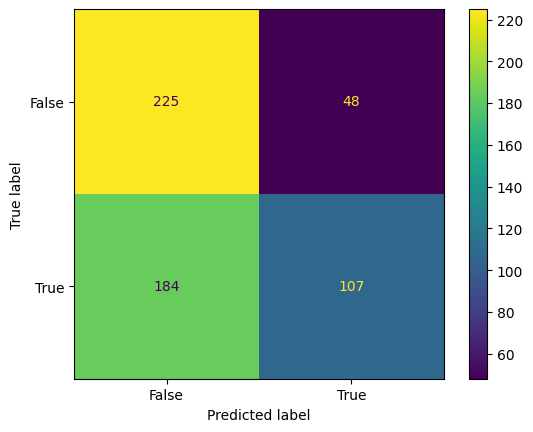

              precision    recall  f1-score   support

           0       0.55      0.82      0.66       273
           1       0.69      0.37      0.48       291

    accuracy                           0.59       564
   macro avg       0.62      0.60      0.57       564
weighted avg       0.62      0.59      0.57       564

MAE :  0.41134751773049644
MSE :  0.41134751773049644


In [ ]:
# Model KNN dengan parameter terbaik
knn1 = KNeighborsClassifier(p= 2, n_neighbors= 1, leaf_size= 25)
knn1.fit(X_train_dtm, y_train)

y_knn1 = knn1.predict(X_test_dtm)
cm_knn1 = metrics.confusion_matrix(y_test, y_knn1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_knn1, display_labels = [False, True])

cm_display.plot()
plt.show()
plt.close()

print(classification_report(y_test, y_knn1))
print('MAE : ',mean_absolute_error(y_test, y_knn1))
print('MSE : ',mean_squared_error(y_test, y_knn1))

<b>Logistic Regression</b>

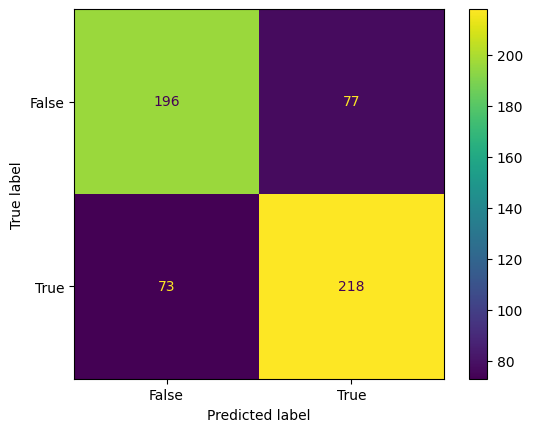

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       273
           1       0.74      0.75      0.74       291

    accuracy                           0.73       564
   macro avg       0.73      0.73      0.73       564
weighted avg       0.73      0.73      0.73       564

MAE :  0.26595744680851063
MSE :  0.26595744680851063


In [ ]:
# Model Logistic Regression dengan parameter terbaik
lr1 = LogisticRegression(C= 1, max_iter= 100, tol= 0.001)
lr1.fit(X_train_dtm, y_train)

y_lr1 = lr1.predict(X_test_dtm)
cm_lr1 = metrics.confusion_matrix(y_test, y_lr1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_lr1, display_labels = [False, True])

cm_display.plot()
plt.show()
plt.close()

print(classification_report(y_test, y_lr1))
print('MAE : ',mean_absolute_error(y_test, y_lr1))
print('MSE : ',mean_squared_error(y_test, y_lr1))

Dapat terlihat seperti uji coba di atas bahwa model Logistic Regression memiliki rata-rata akurasi lebih tinggi dari model KNN. Untuk menambah keefektifan kerja dari kedua model tersebut, kami juga mencoba menggunakan Tfidf Vectorizer untuk mengubah teks menjadi sebuah sparse matrix dengan metode TFIDF. Cara tersebut berhasil, kami melihat adanya peningkatan pada segi akurasi, presisi, dan recall. Ketika menerapkan TFIDF Vectorizer pada model LogiRegres, kami hanya melihat adanya sedikit peningkatan dan tidak terlalu signifikan, tetapi kami melihat perubahan signifikan ketika TFIDFVectorizer diterapkan di model KNN.

##Penggunaan Tfidf Vecotrizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Vectorize Data
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=1000)
X_train_ti = tfidf.fit_transform(X_train)
X_test_ti = tfidf.transform(X_test)

<b>K-Nearest Neighbor</b>

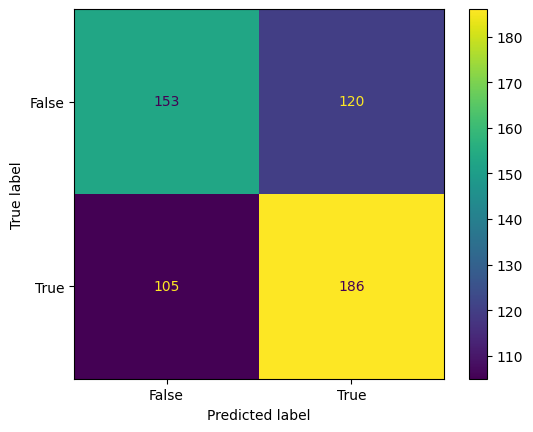

              precision    recall  f1-score   support

           0       0.59      0.56      0.58       273
           1       0.61      0.64      0.62       291

    accuracy                           0.60       564
   macro avg       0.60      0.60      0.60       564
weighted avg       0.60      0.60      0.60       564

MAE :  0.39893617021276595
MSE :  0.39893617021276595


In [ ]:
# Model KNN dengan parameter terbaik dan menggunakan data hasil TFIDF Vectorizer
knn2 = KNeighborsClassifier(p= 2, n_neighbors= 1, leaf_size= 25)
knn2.fit(X_train_ti, y_train)

y_knn2 = knn2.predict(X_test_ti)
cm_knn2 = metrics.confusion_matrix(y_test, y_knn2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_knn2, display_labels = [False, True])

cm_display.plot()
plt.show()
plt.close()

print(classification_report(y_test, y_knn2))
print('MAE : ',mean_absolute_error(y_test, y_knn2))
print('MSE : ',mean_squared_error(y_test, y_knn2))

<b>Logistic Regression</b>

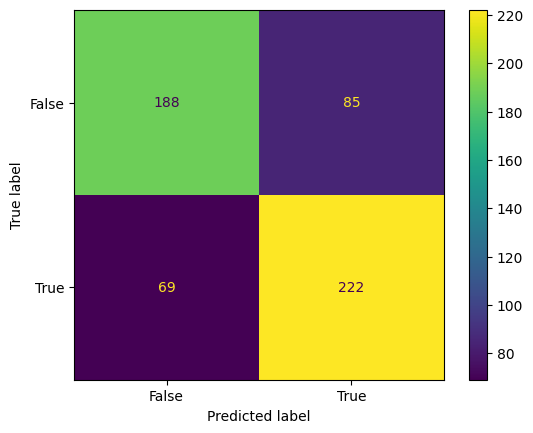

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       273
           1       0.72      0.76      0.74       291

    accuracy                           0.73       564
   macro avg       0.73      0.73      0.73       564
weighted avg       0.73      0.73      0.73       564

MAE :  0.2730496453900709
MSE :  0.2730496453900709


In [ ]:
# Model Logistic Regression dengan parameter terbaik dan menggunakan data hasil TFIDF Vectorizer
lr2 = LogisticRegression(C= 1, max_iter= 100, tol= 0.001)
lr2.fit(X_train_ti, y_train)

y_lr2 = lr2.predict(X_test_ti)
cm_lr2 = metrics.confusion_matrix(y_test, y_lr2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_lr2, display_labels = [False, True])

cm_display.plot()
plt.show()
plt.close()

print(classification_report(y_test, y_lr2))
print('MAE : ',mean_absolute_error(y_test, y_lr2))
print('MSE : ',mean_squared_error(y_test, y_lr2))

#<b>Penggunaan Atribut baru</b><br>


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Vectorizing teks data
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=1000)
X_vec = tfidf.fit_transform(X)
df_x_vec = pd.DataFrame(X_vec.toarray())
df_x_vec.columns = df_x_vec.columns.astype(str)
# Concatting with new feature
X_fin = pd.concat([df_x_vec, df[['negative', 'post']]], axis=1)
# Make new data for train and test
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_fin, y, test_size=0.2, random_state=102)

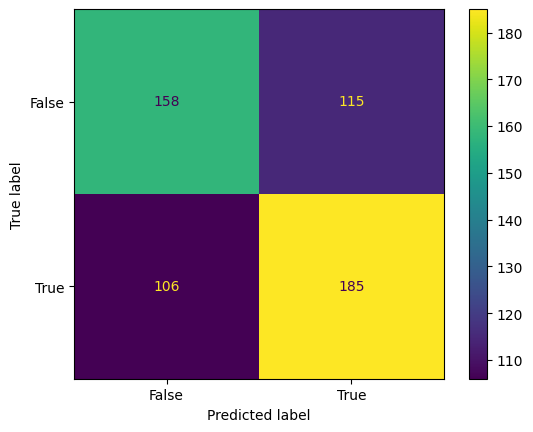

              precision    recall  f1-score   support

           0       0.60      0.58      0.59       273
           1       0.62      0.64      0.63       291

    accuracy                           0.61       564
   macro avg       0.61      0.61      0.61       564
weighted avg       0.61      0.61      0.61       564



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Model KNN dengan parameter terbaik dan menggunakan data hasil TFIDF Vectorizer
knn3 = KNeighborsClassifier(p= 2, n_neighbors= 1, leaf_size= 25)
knn3.fit(X_train_new, y_train_new)

y_knn3 = knn3.predict(X_test_new)
cm_knn3 = metrics.confusion_matrix(y_test_new, y_knn3)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_knn3, display_labels = [False, True])

cm_display.plot()
plt.show()
plt.close()

print(classification_report(y_test_new, y_knn3))

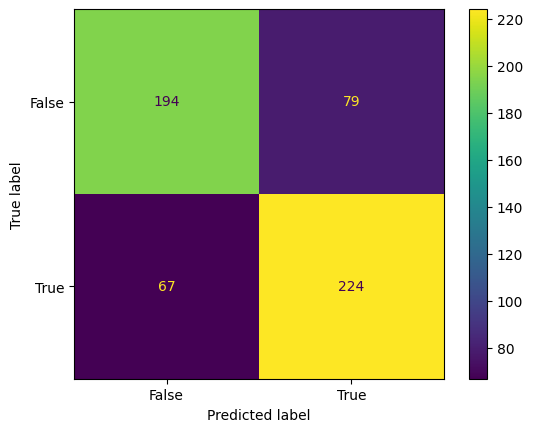

              precision    recall  f1-score   support

           0       0.74      0.71      0.73       273
           1       0.74      0.77      0.75       291

    accuracy                           0.74       564
   macro avg       0.74      0.74      0.74       564
weighted avg       0.74      0.74      0.74       564



In [ ]:
from sklearn.linear_model import LogisticRegression
# Model Logistic Regression dengan parameter terbaik dan menggunakan data hasil hasil penambahan fitur
lr3 = LogisticRegression(C= 1, max_iter= 100, tol= 0.001)
lr3.fit(X_train_new, y_train_new)

y_lr3 = lr3.predict(X_test_new)
cm_lr3 = metrics.confusion_matrix(y_test_new, y_lr3)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_lr3, display_labels = [False, True])

cm_display.plot()
plt.show()
plt.close()

print(classification_report(y_test_new, y_lr3))

#Perbandingan Kinerja Antar Model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

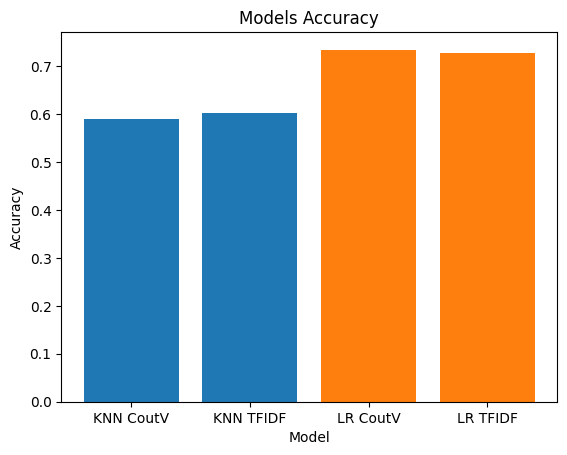

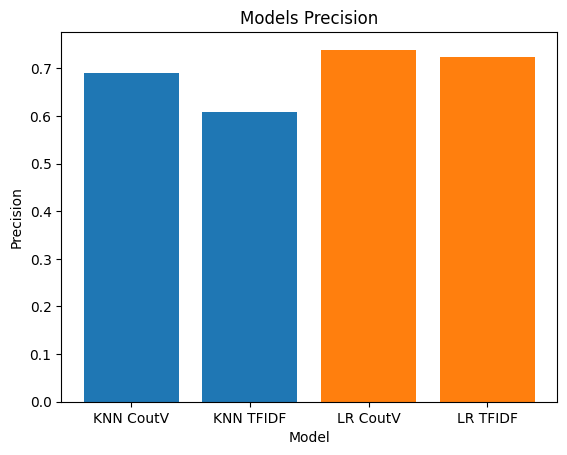

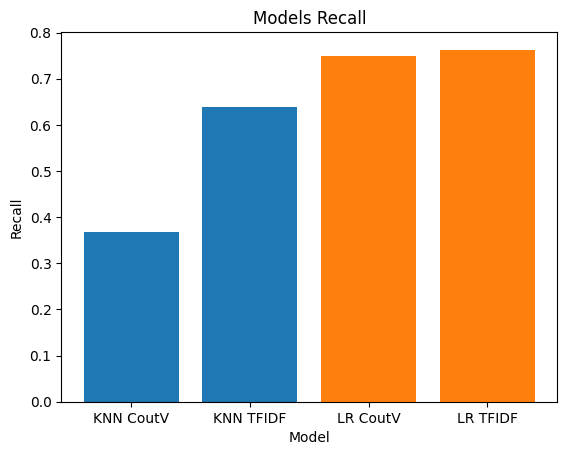

In [ ]:
modelKNN = ['KNN CoutV', 'KNN TFIDF']
modelLR = ['LR CoutV', 'LR TFIDF']

# Make Accuracy Bar Graph Of Models
accKNN = [accuracy_score(y_test, y_knn1), accuracy_score(y_test, y_knn2)]

accLR = [accuracy_score(y_test, y_lr1), accuracy_score(y_test, y_lr2)]

plt.bar(modelKNN, accKNN)
plt.bar(modelLR, accLR)

plt.title('Models Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()
plt.close()
print()

# Make Precision Bar Graph Of Models
accKNN = [precision_score(y_test, y_knn1), precision_score(y_test, y_knn2)]

accLR = [precision_score(y_test, y_lr1), precision_score(y_test, y_lr2)]

plt.bar(modelKNN, accKNN)
plt.bar(modelLR, accLR)

plt.title('Models Precision')
plt.ylabel('Precision')
plt.xlabel('Model')
plt.show()
plt.close()
print()

# Make Recall Bar Graph Of Models
accKNN = [recall_score(y_test, y_knn1), recall_score(y_test, y_knn2)]

accLR = [recall_score(y_test, y_lr1), recall_score(y_test, y_lr2)]

plt.bar(modelKNN, accKNN)
plt.bar(modelLR, accLR)

plt.title('Models Recall')
plt.ylabel('Recall')
plt.xlabel('Model')
plt.show()
plt.close()
print()

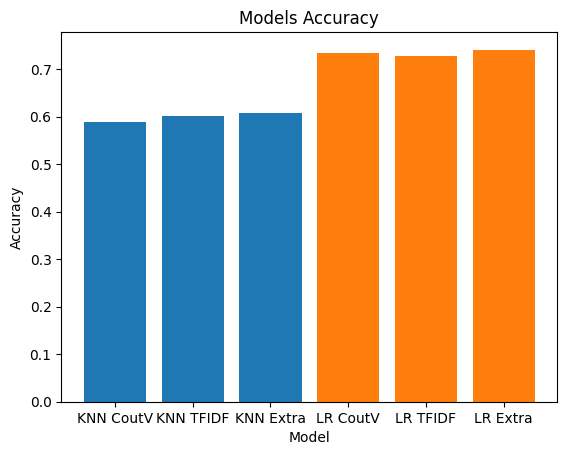

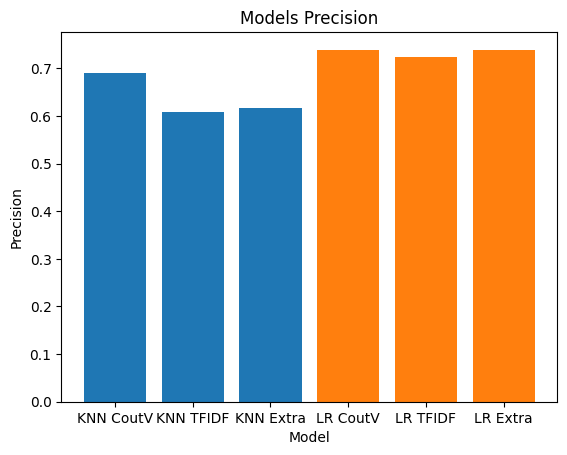

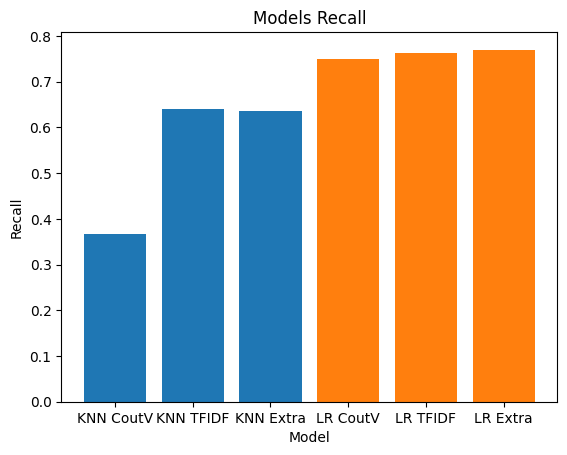

In [ ]:
modelKNN = ['KNN CoutV', 'KNN TFIDF', 'KNN Extra']
modelLR = ['LR CoutV', 'LR TFIDF', 'LR Extra']

# Make Accuracy Bar Graph Of Models
accKNN = [accuracy_score(y_test, y_knn1), accuracy_score(y_test, y_knn2), accuracy_score(y_test_new, y_knn3)]

accLR = [accuracy_score(y_test, y_lr1), accuracy_score(y_test, y_lr2), accuracy_score(y_test_new, y_lr3)]

plt.bar(modelKNN, accKNN)
plt.bar(modelLR, accLR)

plt.title('Models Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()
plt.close()
print()

# Make Precision Bar Graph Of Models
accKNN = [precision_score(y_test, y_knn1), precision_score(y_test, y_knn2), precision_score(y_test_new, y_knn3)]

accLR = [precision_score(y_test, y_lr1), precision_score(y_test, y_lr2), precision_score(y_test_new, y_lr3)]

plt.bar(modelKNN, accKNN)
plt.bar(modelLR, accLR)

plt.title('Models Precision')
plt.ylabel('Precision')
plt.xlabel('Model')
plt.show()
plt.close()
print()

# Make Recall Bar Graph Of Models
accKNN = [recall_score(y_test, y_knn1), recall_score(y_test, y_knn2), recall_score(y_test_new, y_knn3)]

accLR = [recall_score(y_test, y_lr1), recall_score(y_test, y_lr2), recall_score(y_test_new, y_lr3)]

plt.bar(modelKNN, accKNN)
plt.bar(modelLR, accLR)

plt.title('Models Recall')
plt.ylabel('Recall')
plt.xlabel('Model')
plt.show()
plt.close()
print()

# # Make MAE Bar Graph Of Models
# accKNN = [mean_absolute_error(y_test, y_knn1), mean_absolute_error(y_test, y_knn2)]

# accLR = [mean_absolute_error(y_test, y_lr1), mean_absolute_error(y_test, y_lr2)]

# plt.bar(modelKNN, accKNN)
# plt.bar(modelLR, accLR)

# plt.title('Models MAE')
# plt.ylabel('MAE')
# plt.xlabel('Model')
# plt.show()
# plt.close()
# print()

# # Make MSE Bar Graph Of Models
# accKNN = [mean_squared_error(y_test, y_knn1), mean_squared_error(y_test, y_knn2)]

# accLR = [mean_squared_error(y_test, y_lr1), mean_squared_error(y_test, y_lr2)]

# plt.bar(modelKNN, accKNN)
# plt.bar(modelLR, accLR)

# plt.title('Models MSE')
# plt.ylabel('MSE')
# plt.xlabel('Model')
# plt.show()
# plt.close()

Performa metode yang terbaik untuk klasifikasi stres dengan data yang berupa teks adalah metode Logistic Regression dengan menggunakan TF-IDF Vectorizer dan penggunaan fitur tambahan yang memiliki akurasi yang tidak buruk yaitu senilai 0.74 atau 74 %, sedangkan metode KNN sendiri cukup rendah yaitu sekitar 0.61 atau 61 % walaupun sudah menggunakan fitur tambahan dan TF-IDF Vectorizer.

#Analisis hasil klasifikasi

In [ ]:
X_train_new

,0,1,2,3,4,5,6,7,8,9,...,992,993,994,995,996,997,998,999,negative,post
1383,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.142857
157,0.000000,0.0,0.0,0.0,0.0,0.196043,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.500000
2391,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.176471,0.176471
1931,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.120000,0.200000
916,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2674,0.000000,0.0,0.0,0.0,0.0,0.214142,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.071429
2290,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.200000
2638,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071429,0.214286
755,0.126858,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.176512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.166667


In [ ]:
print(X_train_ti)

  (0, 508)	0.13449235766887377
  (0, 103)	0.17073768948130838
  (0, 368)	0.2018509950915675
  (0, 118)	0.24640012391513766
  (0, 900)	0.14454163218909077
  (0, 724)	0.14730789363517988
  (0, 536)	0.15660553549678197
  (0, 750)	0.14956499766412865
  (0, 251)	0.20428876213578923
  (0, 402)	0.1913966908195025
  (0, 431)	0.20599496214664711
  (0, 359)	0.21573003668730567
  (0, 796)	0.2068743605666054
  (0, 411)	0.1786661701218743
  (0, 905)	0.22034527165711665
  (0, 655)	0.127455358757712
  (0, 39)	0.211565823103324
  (0, 387)	0.1363216534051275
  (0, 256)	0.22034527165711665
  (0, 986)	0.3377279028062211
  (0, 608)	0.15856355268673633
  (0, 385)	0.20428876213578923
  (0, 94)	0.19954506528472593
  (0, 507)	0.20346059412719367
  (0, 539)	0.24307327185707642
  :	:
  (2254, 379)	0.1534564279700938
  (2255, 489)	0.2617349487238155
  (2255, 748)	0.2461457894518011
  (2255, 185)	0.25330901489043256
  (2255, 29)	0.21933774047420276
  (2255, 170)	0.2178406066638371
  (2255, 506)	0.2599270216016601

In [ ]:
# Mengakses nilai False Positive dan False Negative
FP = cm_lr3[0][1]
FN = cm_lr3[1][0]

print("Jumlah False Positive:", FP)
print("Jumlah False Negative:", FN)

Jumlah False Positive: 79
Jumlah False Negative: 67


In [ ]:
# Mengakses indeks data yang salah diklasifikasikan
misclassified_indices = [i for i in range(len(y_lr3)) if y_lr3[i] != y_test_new[i]]

print("Indeks data yang salah diklasifikasikan:", misclassified_indices)

Indeks data yang salah diklasifikasikan: [4, 7, 8, 9, 13, 14, 17, 19, 21, 23, 24, 34, 36, 37, 38, 41, 42, 51, 52, 53, 55, 65, 66, 69, 70, 77, 83, 85, 92, 99, 102, 105, 107, 110, 112, 116, 117, 121, 124, 127, 135, 136, 144, 146, 152, 153, 156, 159, 165, 169, 177, 183, 185, 187, 188, 191, 192, 195, 205, 212, 213, 216, 222, 223, 228, 229, 232, 233, 234, 242, 243, 247, 248, 250, 254, 257, 261, 264, 265, 269, 275, 281, 282, 288, 290, 293, 295, 297, 303, 305, 306, 311, 327, 332, 336, 341, 345, 351, 357, 358, 361, 372, 376, 380, 381, 384, 386, 391, 392, 397, 399, 403, 406, 407, 410, 412, 416, 418, 425, 427, 436, 443, 446, 449, 450, 452, 460, 471, 477, 478, 487, 492, 496, 497, 498, 503, 517, 523, 526, 531, 547, 552, 554, 556, 561, 562]


In [ ]:
misclassified_data = [df[['cleaned_text','Sentimen','post','negative','label']].iloc[i] for i in misclassified_indices]

print("Data yang salah diklasifikasikan:", misclassified_data)

Data yang salah diklasifikasikan: [cleaned_text    octob domest violenc awar month domest violenc...
Sentimen                                                  Positif
post                                                          0.2
negative                                                      0.2
label                                                           1
Name: 4, dtype: object, cleaned_text    clear okay monday think human brain work trip ...
Sentimen                                                  Negatif
post                                                     0.054054
negative                                                 0.189189
label                                                           1
Name: 7, dtype: object, cleaned_text    actual give assist half emerg fee come help so...
Sentimen                                                  Negatif
post                                                         0.25
negative                                                   

In [ ]:
df_miss = pd.DataFrame(misclassified_data)
df.head()

,index,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,cleaned_text,Sentimen,post,negative
0,0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353,said felt way sugget go rest trigger ahead you...,Positif,0.208333,0.250000
1,1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817,hey r assist sure right place post goe current...,Positif,0.400000,0.000000
2,2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605,mom hit newspap shock would know like play hit...,Positif,0.166667,0.222222
3,3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555,met new boyfriend amaz kind sweet good student...,Positif,0.156627,0.120482
4,4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005,octob domest violenc awar month domest violenc...,Positif,0.200000,0.200000


<Figure size 2000x1500 with 0 Axes>

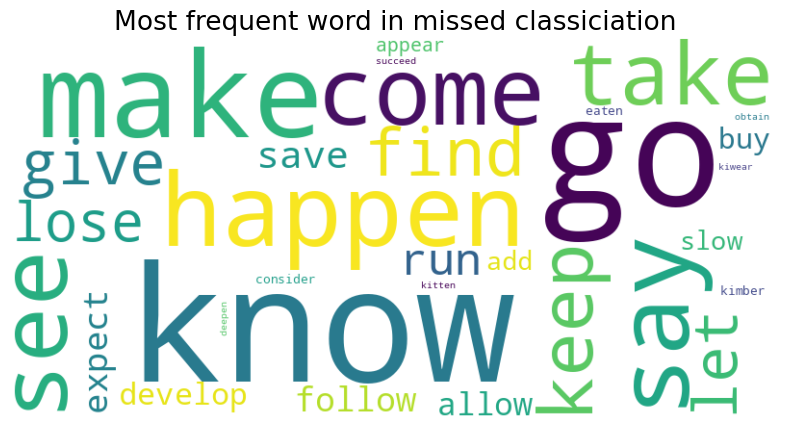

In [ ]:
wd_miss = ' '.join([word for word in df_miss['cleaned_text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud_pos = WordCloud(max_words=500, width=1600, height=800).generate(wd_miss)
# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent word in missed classiciation', fontsize=19)
plt.show()

In [ ]:
df_missp = df[df['label'] == 1]
df_missn = df[df['label'] == 0]

<Figure size 2000x1500 with 0 Axes>

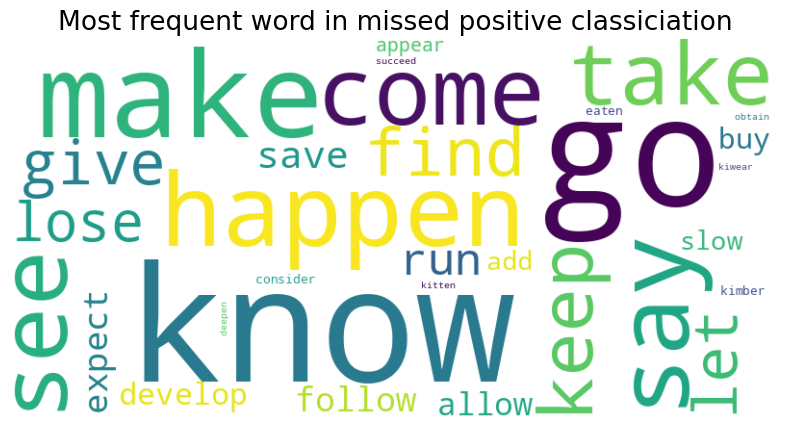

In [ ]:
wd_missp = ' '.join([word for word in df_missp['cleaned_text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud_pos = WordCloud(max_words=500, width=1600, height=800).generate(wd_missp)
# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent word in missed positive classiciation', fontsize=19)
plt.show()

<Figure size 2000x1500 with 0 Axes>

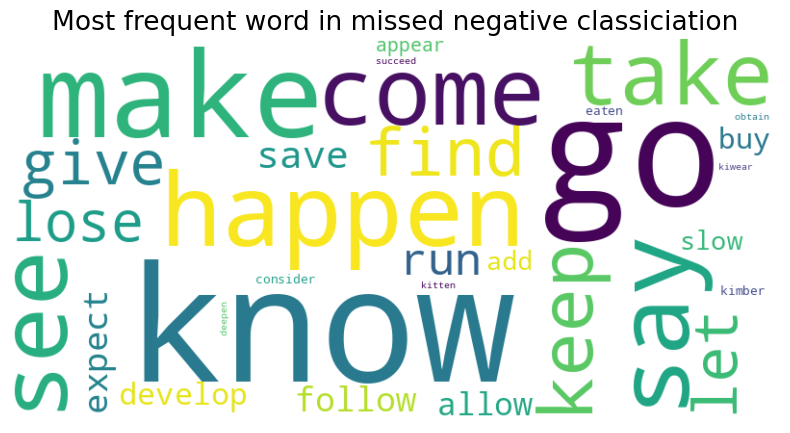

In [ ]:
wd_missn = ' '.join([word for word in df_missn['cleaned_text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud_pos = WordCloud(max_words=500, width=1600, height=800).generate(wd_missn)
# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent word in missed negative classiciation', fontsize=19)
plt.show()

Dari data yang salah diklasifikasikan maka adalah know, go, happen, make, say, come, dan beberapa kata lainnya. Kata tersebut merupakan kata yang bisa dibilang cukup netral, dimana tidak menunjukkan sentimen seperti positif atau negatif. Untuk memastikan maka kata tersebut juga akan nilai sentimennya menggunakan pustaka NRCLex

In [ ]:
lexicon = nrclex.NRCLex(wd_miss)
lexicon.affect_frequencies

{'fear': 0.08749500599280863,
 'anger': 0.07471034758290052,
 'anticip': 0.0,
 'trust': 0.11186576108669596,
 'surprise': 0.046743907311226525,
 'positive': 0.17618857371154614,
 'negative': 0.16220535357570914,
 'sadness': 0.07790651218537754,
 'disgust': 0.04794246903715541,
 'joy': 0.08509788254095085,
 'anticipation': 0.12984418697562924}

dihasilkan bahwa nilai dari sentimen penghitungan positif dan negatif dari kata-kata tersebut tidak berbeda jauh   yaitu 1.76 untuk sentimen positif dan 1.62 untuk sentimen negatif. Hal ini menunjukkan bahwa data yang memiliki kata-kata yang netral atau tidak menunjukkan sentimen cenderung salah diklasifikasikan

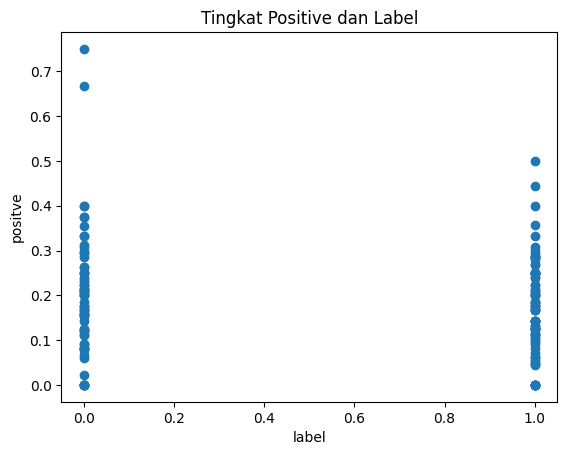

In [ ]:
plt.scatter(df_miss['label'], df_miss['post'])
plt.xlabel('label')
plt.ylabel('positve')
plt.title('Tingkat Positive dan Label')
plt.show()

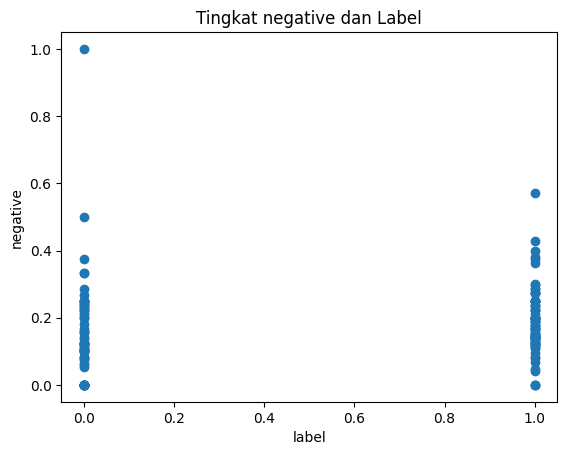

In [ ]:
plt.scatter(df_miss['label'], df_miss['negative'])
plt.xlabel('label')
plt.ylabel('negative')
plt.title('Tingkat negative dan Label')
plt.show()

In [ ]:
df_miss['ration_neg_pos'] = abs(df_miss['post']-df_miss['negative'])
df_miss.head(10)

,cleaned_text,Sentimen,post,negative,label,ration_neg_pos
4,octob domest violenc awar month domest violenc...,Positif,0.200000,0.200000,1,0.000000
7,clear okay monday think human brain work trip ...,Negatif,0.054054,0.189189,1,0.135135
8,actual give assist half emerg fee come help so...,Negatif,0.250000,0.250000,1,0.000000
9,feel like street life fuck head much even know...,Negatif,0.176471,0.235294,1,0.058824
13,place citi shelter space us put babi liter str...,Positif,0.206897,0.068966,1,0.137931
14,past coupl month worst anxieti gotten bad effe...,Negatif,0.058824,0.117647,1,0.058824
17,hurt leav mark lie kept cough today feel kinda...,Netral,0.100000,0.250000,1,0.150000
19,plan move togeth fanci month home would contri...,Positif,0.208333,0.125000,0,0.083333
21,go hard time breakup start see therapist psych...,Negatif,0.263158,0.105263,0,0.157895
23,switch blade open arm sweater vest cover rag u...,Positif,0.111111,0.222222,0,0.111111


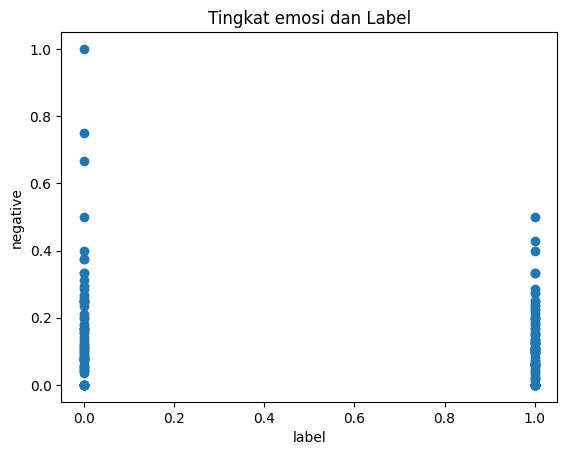

In [ ]:
plt.scatter(df_miss['label'], df_miss['ration_neg_pos'])
plt.xlabel('label')
plt.ylabel('negative')
plt.title('Tingkat emosi dan Label')
plt.show()

In [ ]:
df_miss[['post','negative','Sentimen','label','ration_neg_pos']].head(10)

,post,negative,Sentimen,label,ration_neg_pos
4,0.200000,0.200000,Positif,1,0.000000
7,0.054054,0.189189,Negatif,1,0.135135
8,0.250000,0.250000,Negatif,1,0.000000
9,0.176471,0.235294,Negatif,1,0.058824
13,0.206897,0.068966,Positif,1,0.137931
14,0.058824,0.117647,Negatif,1,0.058824
17,0.100000,0.250000,Netral,1,0.150000
19,0.208333,0.125000,Positif,0,0.083333
21,0.263158,0.105263,Negatif,0,0.157895
23,0.111111,0.222222,Positif,0,0.111111


In [ ]:
sorted_df = df_miss.sort_values(by='ration_neg_pos', ascending=False)
sorted_df.head(10)

,cleaned_text,Sentimen,post,negative,label,ration_neg_pos
372,knew garret would never seen come famili exhau...,Netral,0.000000,1.000000,0,1.000000
517,hey reddit ptsd independ documentari filmmak w...,Positif,0.750000,0.000000,0,0.750000
410,clearli need talk coupl exampl mind drive poin...,Positif,0.666667,0.000000,0,0.666667
269,steel thermo calori block ration sever mre sta...,Negatif,0.000000,0.500000,0,0.500000
248,one girl pull ask like said yeah goe like frie...,Negatif,0.500000,0.000000,1,0.500000
107,chest differ feel would feel fire chaotic feel...,Negatif,0.000000,0.428571,1,0.428571
446,help spread word also run competit social medi...,Positif,0.400000,0.000000,0,0.400000
391,need help need sound advic overcom situat need...,Negatif,0.000000,0.400000,1,0.400000
117,ad bunch secur specif scenario comfort keep th...,Positif,0.375000,0.000000,0,0.375000
265,look anyon interest take minut survey chanc wi...,Positif,0.375000,0.000000,0,0.375000


In [ ]:
sorted_df = df_miss.sort_values(by='ration_neg_pos', ascending=True)
sorted_df.head(20)

,cleaned_text,Sentimen,post,negative,label,ration_neg_pos
4,octob domest violenc awar month domest violenc...,Positif,0.200000,0.200000,1,0.0
146,sleepi want sleep bad second lay get wors ches...,Negatif,0.166667,0.166667,1,0.0
159,alway type person gravit toward romanc thought...,Positif,0.214286,0.214286,0,0.0
127,senior start go colleg applic process feel ove...,Negatif,0.142857,0.142857,1,0.0
412,start wors bring convers ask dare call name da...,Netral,0.000000,0.000000,0,0.0
416,kick hous go make leav middl night multipl tim...,Positif,0.222222,0.222222,1,0.0
83,got stitch parent love bf fact mom close go wa...,Positif,0.142857,0.142857,1,0.0
69,say stand hear got enough plate actual suffer ...,Negatif,0.285714,0.285714,1,0.0
386,feel like noth even worthi consid success carp...,Positif,0.125000,0.125000,1,0.0
496,love super paranoid whole deal current situat ...,Positif,0.200000,0.200000,1,0.0


Analisis selanjutnya dilakukan terhadap fitur tambahan yang digunakan. Disini data-data yang salah diklasifikasikan akan dilihat nilai dari fitur tambahan tersebut yaitu jumlah kata positif dan kata negatif. Dari hasil pengamatan, dapat diketahui bahwa perbedaan nilai dari jumlah kata positif dan negatif kebanyakan sangat kecil. Hal ini menunjukkan bahwa dalam data tersebut tidak  terlalu condong ke arah positif atau negatif sentimennya sehingga model tidak bisa mengklasifikasikan dengan sempurna.